In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

subjects: 22
sessions: 127
trials: 40138
  subj_idx  session  trial  reward  stimulus  difficulty        rt  correct  \
0     C1H1       23      1       1         1           2  2.135156        1   
1     C1H1       23      3       1         1           4       NaN        0   
2     C1H1       23      4       1         0           4       NaN        0   
3     C1H1       23      5       1         1           5  0.429073        1   
4     C1H1       23      6       1         1           0  1.101905        1   

   choice  hit  fa  miss  cr       cr2  miss2  
0       1    1   0     0   0  4.240000    0.0  
1       0    0   0     1   0  1.880000    3.0  
2       1    0   1     0   0  3.387153    0.0  
3       1    1   0     0   0  2.280000    0.0  
4       1    1   0     0   0  6.280000    0.0  
      subj_idx  session  trial  reward  stimulus  difficulty        rt  \
40133     W1T1       28    353       2         1           0  0.395351   
40134     W1T1       28    354       2         0

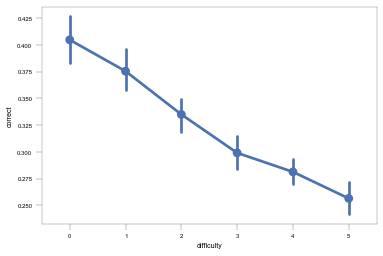

In [11]:
import sys, os, glob
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
sns.set(style='ticks', font='Arial', font_scale=1, rc={
    'axes.linewidth': 0.25, 
    'axes.labelsize': 7, 
    'axes.titlesize': 7, 
    'xtick.labelsize': 6, 
    'ytick.labelsize': 6, 
    'legend.fontsize': 6, 
    'xtick.major.width': 0.25, 
    'ytick.major.width': 0.25,
    'text.color': 'Black',
    'axes.labelcolor':'Black',
    'xtick.color':'Black',
    'ytick.color':'Black',} )
sns.plotting_context()

# directories:
#project_dir = '/Users/jwdegee/Box Sync/undergrad_instructions/'
#fig_dir = os.path.join(project_dir, 'figs')

# load:
df = pd.read_csv('data.csv')

# subselect rows:
df = df.loc[df['trial']<421,:].reset_index(drop=True)

# subselect columns:
columns = ['subj_idx', 'session', 'trial', 'block_type', 'stimulus', 'difficulty_b2', 'rt', 'correct', 'choice', 'hit', 'fa', 'miss', 'cr', 'cr2', 'miss2']
df = df.loc[:,columns]

# rename some columns:
df = df.rename(columns={'block_type': 'reward',
                        'difficulty_b2': 'difficulty',})

# make integers:
columns = ['session', 'trial', 'reward', 'stimulus', 'difficulty', 'correct', 'choice', 'hit', 'fa', 'miss', 'cr']
df.loc[:,columns] = df.loc[:,columns].astype(int)

# set RT to NaN on all but hit trials:
df.loc[df['hit']!=1, 'rt'] = np.NaN

# print some info on subject and sessions:
subjects = [subj for subj, d in df.groupby('subj_idx')]
nr_sessions = [len(np.unique(d['session'])) for subj, d in df.groupby('subj_idx')]
print('subjects: {}'.format(len(subjects)))
print('sessions: {}'.format(sum(nr_sessions)))
print('trials: {}'.format(df.shape[0]))

# check out dataframe:
print(df.head())
print(df.tail())

# the old way of computing stuff:
correct = []
for s in np.unique(df['subj_idx']):
    temp = df.loc[df['subj_idx']==s, 'correct']
    correct.append(temp.mean())

# the new and better way:
res = df.groupby(['subj_idx']).mean()['correct'].reset_index()

# this becomes especially helpful when we want to do this separately for reward block and difficulty:
res = df.groupby(['subj_idx', 'difficulty']).mean()['correct'].reset_index()

# let's plot the result:
fig = plt.figure()
ax = fig.add_subplot(111)
sns.pointplot(x='difficulty', y='correct', units='subj_idx', data=res, ax=ax)
#fig.savefig(os.path.join(fig_dir, 'performance.pdf'))

#FIXME plot the same for hit-rates, and compare to the overall fa-rate
# hit-rate: nr_hit / (nr_hit + nr_miss2)
# fa_rate: nr_fa / (nr_fa + nr_cr2)

#FIXME plot hit-rates both as a function of reward and difficulty



In [35]:
df.head()

,subj_idx,session,trial,reward,stimulus,difficulty,rt,correct,choice,hit,fa,miss,cr,cr2,miss2
0,C1H1,23,1,1,1,2,2.135156,1,1,1,0,0,0,4.240000,0.0
1,C1H1,23,3,1,1,4,NaN,0,0,0,0,1,0,1.880000,3.0
2,C1H1,23,4,1,0,4,NaN,0,1,0,1,0,0,3.387153,0.0
3,C1H1,23,5,1,1,5,0.429073,1,1,1,0,0,0,2.280000,0.0
4,C1H1,23,6,1,1,0,1.101905,1,1,1,0,0,0,6.280000,0.0


In [40]:
c = df.groupby('subj_idx').get_group('C1H1')

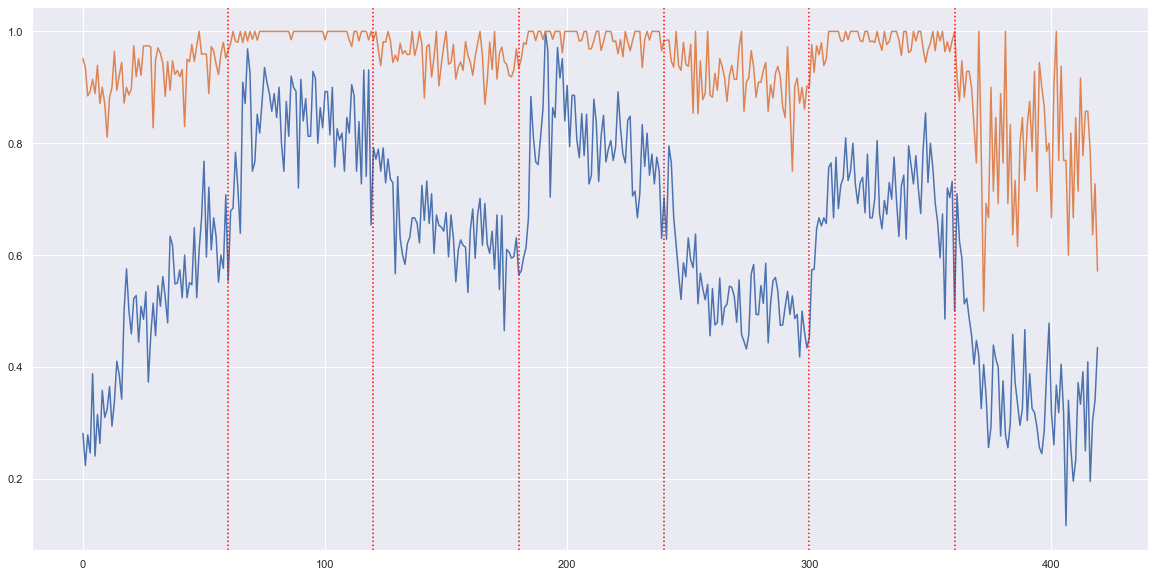

In [140]:
fig, ax = plt.subplots(figsize = (20, 10))

sns.set()



hue = ['blue', 'orange', 'blue', 'orange','blue', 'orange','blue']
ranges = [0, 60, 120, 180, 240, 300, 360, 420]
avghit = df.groupby(['trial', 'stimulus']).mean().loc[(range(421) ,1), 'hit'].values
avgfa = df.groupby(['trial', 'stimulus']).mean().loc[(range(421) ,0), 'fa'].values

# for i in range(len(ranges) -1):
#     ax.plot(range(ranges[i], ranges[i+1]), avghit[ranges[i]:ranges[i + 1]], color = hue[i])

plt.plot(avghit)
plt.plot(avgfa)


for n in range(1, 420):
    if n% 60 == 0:
        ax.axvline(n, color = 'red', linestyle = ':')

# ax.scatter(df['carat'], df['price'], c=df['color'].apply(lambda x: colors[x]))

In [110]:
hue = df.groupby('trial').mean()['reward']

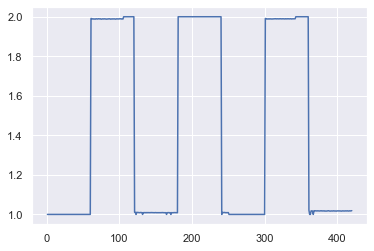

In [112]:
plt.plot(hue)

In [139]:
df.groupby(['trial', 'stimulus']).mean()

session    reward  difficulty        rt   correct    choice  \
trial stimulus                                                                  
1     0         24.390244  1.000000    3.146341       NaN  0.048780  0.951220   
      1         22.859375  1.000000    2.296875  1.572501  0.281250  0.281250   
2     0         22.354839  1.000000    2.225806       NaN  0.064516  0.935484   
      1         23.355263  1.000000    2.789474  1.379465  0.223684  0.223684   
3     0         24.307692  1.000000    2.576923       NaN  0.115385  0.884615   
      1         22.582278  1.000000    2.696203  1.397508  0.278481  0.278481   
4     0         25.535714  1.000000    2.821429       NaN  0.107143  0.892857   
      1         22.661538  1.000000    2.430769  1.776329  0.246154  0.246154   
5     0         21.771429  1.000000    2.685714       NaN  0.085714  0.914286   
      1         23.238806  1.000000    2.522388  1.639067  0.388060  0.388060   
6     0         24.037037  1.000000    2.074074       NaN  0.111111  0.888889   
      1         21.974684  1.000000    2.329114  1.494073  0.240506  0.240506   
7     0         23.242424  1.000000    2.484848       NaN  0.060606  0.939394   
      1         23.123288  1.000000    2.328767  1.635181  0.315068  0.315068   
8     0         21.451613  1.000000    1.903226       NaN  0.129032  0.870968   
      1         23.710526  1.000000    2.565789  1.390753  0.263158  0.263158   
9     0         22.433333  1.000000    2.666667       NaN  0.100000  0.900000   
      1         22.913580  1.000000    2.061728  1.338227  0.358025  0.358025   
10    0         21.612903  1.000000    2.419355       NaN  0.129032  0.870968   
      1         22.746479  1.000000    2.323944  1.350696  0.309859  0.309859   
11    0         21.432432  1.000000    2.351351       NaN  0.189189  0.810811   
      1         24.154930  1.000000    2.309859  1.407021  0.323944  0.323944   
12    0         21.558824  1.000000    2.500000       NaN  0.117647  0.882353   
      1         24.040541  1.000000    2.256757  1.504499  0.364865  0.364865   
13    0         21.550000  1.000000    2.500000       NaN  0.100000  0.900000   
      1         23.411765  1.000000    2.250000  1.347667  0.294118  0.294118   
14    0         21.214286  1.000000    2.178571       NaN  0.035714  0.964286   
      1         23.896104  1.000000    2.701299  1.872678  0.337662  0.337662   
15    0         23.131579  1.000000    2.447368       NaN  0.105263  0.894737   
      1         22.846154  1.000000    2.423077  1.631922  0.410256  0.410256   
...                   ...       ...         ...       ...       ...       ...   
406   0         20.384615  1.076923    1.846154       NaN  0.230769  0.769231   
      1         20.765957  1.000000    2.489362  1.522144  0.319149  0.319149   
407   0         21.923077  1.000000    2.615385       NaN  0.230769  0.769231   
      1         20.302326  1.023256    2.581395  1.541199  0.116279  0.116279   
408   0         20.900000  1.100000    2.800000       NaN  0.400000  0.600000   
      1         20.191489  1.000000    2.936170  1.631652  0.340426  0.340426   
409   0         18.272727  1.090909    1.363636       NaN  0.181818  0.818182   
      1         20.978723  1.000000    2.978723  1.370449  0.255319  0.255319   
410   0         19.416667  1.083333    2.333333       NaN  0.333333  0.666667   
      1         21.000000  1.000000    3.217391  1.208986  0.195652  0.195652   
411   0         23.230769  1.076923    2.692308       NaN  0.153846  0.846154   
      1         19.604651  1.000000    2.558140  1.274082  0.232558  0.232558   
412   0         23.142857  1.071429    2.571429       NaN  0.285714  0.714286   
      1         19.953488  1.000000    2.720930  1.482499  0.372093  0.372093   
413   0         20.416667  1.000000    3.166667       NaN  0.083333  0.916667   
      1         20.844444  1.022222    2.600000  1.462908  0.333333  0.333333   
414   0         22.555556  1.000000    2.333333  

In [127]:
hue

['blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange'